In [1]:
### Download libraries
#%pip install uproot 
#%pip install awkward 
#%pip install mplhep 
#%pip install numpy 
#%pip install matplotlib 
#%pip install scipy
### Upgrade libraries to latest version
#%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade

In [2]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit

In [11]:
path_data = 'opal_data/mc/'
file = uproot.open(path_data+'tt.root')
ttree_name = 'myTTree'
file[ttree_name].keys()
branches = file[ttree_name].arrays()
## here, we can determine arbitrary the values of ee that we need..
var1 = 'Ncharged'
var2 = 'Pcharged'
var3 = 'E_ecal'
var4 = 'E_hcal'
var5 = 'cos_thet'
var6 = 'cos_thru'
var7 = 'E_lep'
## converting the ak arrays into np arrays
nchar = ak.to_numpy(branches[var1])
pchar = ak.to_numpy(branches[var2])
Ecal  = ak.to_numpy(branches[var3])
Hcal  = ak.to_numpy(branches[var4])
cos_theta = ak.to_numpy(branches[var5])
cos_thrust = ak.to_numpy(branches[var6])
Elep =ak.to_numpy(branches[var7])

79214


# Plotting the data of MonteCarlo to check if it's what we expected

0.0 18.0
0.0 719342.8
0.6279109 101.030716
0.0 110.909996
-0.99373746 999.0
-0.98389995 999.0


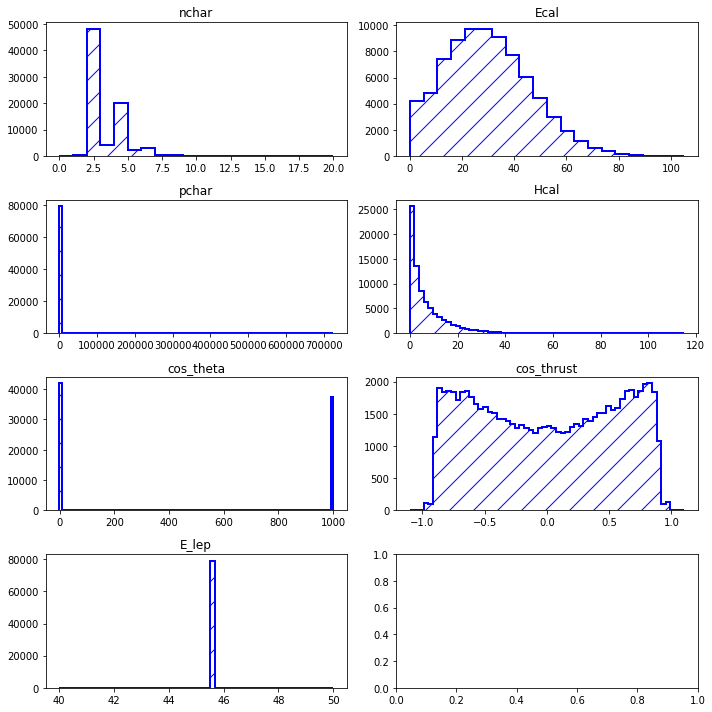

In [4]:
##comparing all Ecal(SumE)
print(min(nchar),max(nchar))
print(min(pchar),max(pchar))
print(min(Ecal),max(Ecal))
print(min(Hcal),max(Hcal))
print(min(cos_theta),max(cos_theta))
print(min(cos_thrust),max(cos_thrust))
fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs[0, 0].hist(nchar,bins=20,range=(0,20), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 0].set_title("nchar")
axs[1, 0].hist(pchar,bins=100,range=(0,725000), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[1, 0].set_title("pchar")
axs[0, 1].hist(Ecal,bins=20,range=(0,105), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
axs[0, 1].set_title("Ecal")
axs[1, 1].hist(Hcal,bins=60,range=(0,115), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[1, 1].set_title("Hcal")
axs[2,0].hist(cos_theta,bins=100,range=(-1.1,1001), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,0].set_title("cos_theta")
axs[2,1].hist(cos_thrust,bins=60,range=(-1.1,1.1), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[2,1].set_title("cos_thrust")
axs[3,0].hist(Elep,bins=60,range=(40,50), histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='P')
axs[3,0].set_title("E_lep")
fig.tight_layout()

# Applying the cut(s)

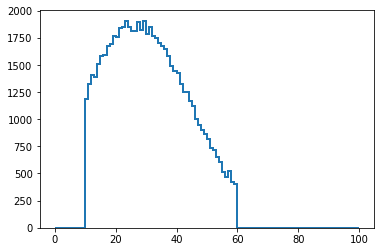

In [5]:
mynewmask = (branches['Ncharged'] <= 8) & (branches['E_ecal'] >= 10) & (branches['E_ecal'] <= 60)

# Plot data with statistical uncertainties
new_bin_content, new_bin_edges, _ = plt.hist(Ecal[mynewmask],bins=100,range=(0,100),  histtype='step', linewidth=2, label='cos_theta')
new_mid = 0.5*(new_bin_edges[1:] + new_bin_edges[:-1]) #Calculate midpoint of the bars
#plt.xlim(0,10)
plt.show()

In [6]:
ratio = (sum(mynewmask))/(len(mynewmask))

In [7]:
print(ratio)

0.8496730375943646
